In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
tf.__version__

'2.0.0'

In [4]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"
train_tf = pd.read_csv(TRAIN_DATA_URL)
test_data = pd.read_csv(TEST_DATA_URL)

In [5]:
print(train_tf.shape)
print(test_data.shape)

(627, 10)
(264, 10)


In [6]:
train_tf[train_tf.isnull()].count()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [7]:
train_data = train_tf[:500]
valid_data = train_tf[500:]

In [8]:
print(train_data.shape)
print(valid_data.shape)

(500, 10)
(127, 10)


In [9]:
y_train= train_data.pop('survived')
y_test = test_data.pop('survived')
y_valid= valid_data.pop('survived')



In [10]:
train_data.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
categorical_columns = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
numeric_columns = ['age', 'fare']

feature_columns = []#收集所有feature，以运用到dataset上
#对离散特征进行onehot 编码处理
for column in categorical_columns:
    vocab = train_data[column].unique()#用unique取出唯一值
    feature_columns.append(
        tf.feature_column.indicator_column(
            tf.feature_column.categorical_column_with_vocabulary_list(column, vocab)))
    
#categorical_column_with_vocabulary_list提取特征list
# indicator_column 对离散特征进行one_hot编码

#对连续型特征直接封装
for column in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(column, dtype = tf.float32))

In [12]:
tf.print(feature_columns)

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town',

In [15]:
# 构建数据集.from_tensor_slices()传入字典
def make_datasets(x, y, epochs = 10, shuffle = True, batch_size = 32 ):
    dataset = tf.data.Dataset.from_tensor_slices((dict(x), y))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size)
    return dataset

In [16]:
#测试
train_dataset = make_datasets(train_data, y_train, batch_size = 5)
for x,y in train_dataset.take(1):
    tf.print(x, ' \n\n\n',y)

{'age': [9 21 16 4 32],
 'alone': ["n" "n" "y" "n" "y"],
 'class': ["Third" "First" "Third" "Third" "Third"],
 'deck': ["unknown" "D" "unknown" "unknown" "unknown"],
 'embark_town': ["Southampton" "Southampton" "Southampton" "Queenstown" "Southampton"],
 'fare': [34.375 77.2875 8.05 29.125 56.4958],
 'n_siblings_spouses': [2 0 0 4 0],
 'parch': [2 1 0 1 0],
 'sex': ["female" "male" "male" "male" "male"]}  


 [0 0 1 0 1]


In [17]:
#测试
# keras.layers.DenseFeature可以吧feature运用到datasets上,对离散型特征进行了one_hot编码，连续型特征数值类型转化
for x,y in train_dataset.take(1):
    age_column = feature_columns[7]
    gender_column = feature_columns[0]
    class_column = feature_columns[3]
    
    tf.print(keras.layers.DenseFeatures(age_column)(x))#把age的特征用在x上
    tf.print(keras.layers.DenseFeatures(gender_column)(x))
    tf.print(keras.layers.DenseFeatures(class_column)(x))




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[38]
 [22]
 [20]
 [28]
 [28]]

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer

In [19]:
#测试
# keras.layers.DenseFeature
for x, y in train_dataset.take(1):
    print(keras.layers.DenseFeatures(feature_columns)(x))



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[21.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   7.7958  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [28.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   8.1125  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.     

In [27]:
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),#注意不再需要input_shape
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy',
                     optimizer = 'adam',#keras.optimizers.SGD(lr = 1e-2),
                      metrics = ['accuracy'])


In [28]:
#1、model.fit
train_dataset = make_datasets(train_data, y_train,epochs=100)
valid_dataset = make_datasets(valid_data, y_valid,epochs=1,shuffle=False)
test_dataset = make_datasets(test_data, y_test,epochs=1,shuffle=False)

history = model.fit(train_dataset,
                    validation_data=valid_dataset,
                    steps_per_epoch=500//32,
                    epochs=100,
                    validation_steps = 127//32
                   )#steps_per_epoch=训练集的样本数//batch_size


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train for 15 steps, validate for 3 steps
Epoch 1/100
15/15 [==============================] - 4s 268ms/step - loss: 1.2071 - accuracy: 0.5854 - val_loss: 0.9097 - val_accuracy: 0.6875
Epoch 2/100
15/15 [==============================] - 0s 14ms/step - loss: 0.9322 - accuracy: 0.6562 - val_loss: 0.5139 - val_accuracy: 0.7188
Epoch 3/100
15/15 [==============================] - 0s 14ms/step - loss: 0.6415 - accuracy: 0.6667 - val_loss: 0.5126 - val_accuracy: 0.7500
Epoch 4/100
15/15 [=====================

15/15 [==============================] - 0s 15ms/step - loss: 0.4105 - accuracy: 0.8188 - val_loss: 0.4031 - val_accuracy: 0.8229
Epoch 54/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3767 - accuracy: 0.8521 - val_loss: 0.3915 - val_accuracy: 0.8333
Epoch 55/100
15/15 [==============================] - 0s 15ms/step - loss: 0.3664 - accuracy: 0.8458 - val_loss: 0.4767 - val_accuracy: 0.7812
Epoch 56/100
15/15 [==============================] - 0s 15ms/step - loss: 0.4963 - accuracy: 0.7937 - val_loss: 0.4371 - val_accuracy: 0.7917
Epoch 57/100
15/15 [==============================] - 0s 15ms/step - loss: 0.4644 - accuracy: 0.7958 - val_loss: 0.4079 - val_accuracy: 0.8333
Epoch 58/100
15/15 [==============================] - 0s 14ms/step - loss: 0.3849 - accuracy: 0.8188 - val_loss: 0.3897 - val_accuracy: 0.8333
Epoch 59/100
15/15 [==============================] - 0s 14ms/step - loss: 0.4086 - accuracy: 0.8104 - val_loss: 0.4269 - val_accuracy: 0.7917
Epoch 60/100

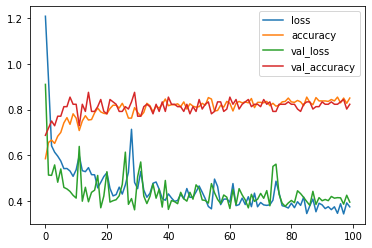

In [30]:
pd.DataFrame(history.history).plot()

In [32]:
# 2.model -> estimator ->train
estimator = keras.estimator.model_to_estimator(model)

# def input_fn():
#   return make_datasets(train_data, y_train,epochs=100)
# estimator.train(input_fn)

estimator.train(input_fn = lambda: make_datasets(train_data, y_train, epochs=100))
#参数只有一个input_fn：1、是一个函数
#                            2、返回元组（features,labels）或（feature,label)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
Note that this doesn't affect the state of the model instance you passed as `keras_model` argument.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/l7/d1pnsddn4wd3z6qry0tp5rvh0000gn/T/tmpu1h35qor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x63facfc90>, '_task_type': 'worker', '_task_id': 0, '_glo

ValueError: Unexpectedly found an instance of type `<class 'dict'>`. Expected a symbolic tensor instance.

In [33]:
train_dataset.take(1)

<TakeDataset shapes: ({sex: (None,), age: (None,), n_siblings_spouses: (None,), parch: (None,), fare: (None,), class: (None,), deck: (None,), embark_town: (None,), alone: (None,)}, (None,)), types: ({sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int32, parch: tf.int32, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int32)>